In [1]:
import euroleague as e
import matplotlib.pyplot as plt

# Get data

In [2]:
# fetch teams stats data using the euroleague module
seasons_rounds = {2016: 30, 2017: 30, 2018: 30, 2019: 18}
teams_stats = e.get_teams_stats(seasons_rounds, )

# create column for highlighting teams in offensive and defensive rating plot
fnr18_cond = (teams_stats['team'] == 'FNR') & (teams_stats['season'] == 2018)
mta19_cond = (teams_stats['team'] == 'MTA') & (teams_stats['season'] == 2019)
pts_rtg_disply_cond = fnr18_cond | mta19_cond
teams_stats.loc[pts_rtg_disply_cond, 'pts_rtg_disply'] = teams_stats.loc[pts_rtg_disply_cond, 'team']

# create columns for highlighting teams in win% plot
win_display_cond = (teams_stats['team'].isin(['ASV', 'ZAL'])) & (teams_stats['season'] == 2019)
teams_stats.loc[win_display_cond, 'win%_disply'] = teams_stats.loc[win_display_cond, 'team']

# What is the advantage of using ratings instead of win% and score difference to examine how good teams are?

<font size="4">
Examining teams win% to understand their strength can be misleading:
</font>
<font size="3">
<li>Teams can have multiple wins/losses of very close games, in this case, with almost the same<br>
    &emsp;&ensp;performance they will have a much better/worse win%</li>
</font><br>
<font size="4">
Using points scored / conceded / difference is problematic as well:
</font>
<font size="3">
<li>Teams play at different pace, teams that play fast will score and concede more points</li>
</font><br>
<font size="4">
Rating is a more controlled way to estimate teams offensive and defensive performance:
</font>
<font size="3">
<li>Offensive rating: Points scored per 100 possessions</li>
<li>Defensive rating: Points conceded per 100 possessions (lower is better)</li>
<li>Net rating: Points differential per 100 possessions</li>
</font><br>
<font size="4">
Ratings have limitations too:
</font>
<font size="3">
<li>Ratings can change in garbage time while teams performance is less relevant</li>
<li>One can claim that performance in crunch time is more indicative of teams abilities</li>
<li>Nevertheless, during a relatively long regular season, net rating is considered a more reliable measure of performance</li>

# Compare win% to net rating

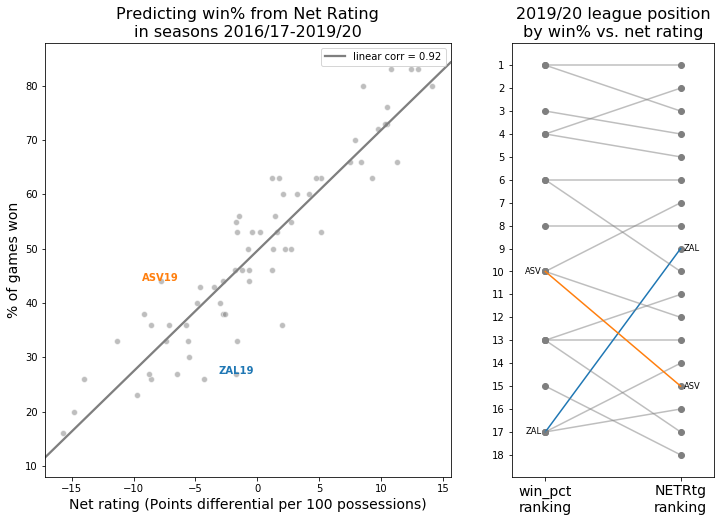

In [3]:
# set up figure and axes
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [2, 1]})

# plot net rating vs win%
e.plot_bivariate(
    df=teams_stats, x='NETRtg', y='win_pct', hue='win%_disply', fit_reg=True, ax=ax0
);
ax0.set_title('Predicting win% from Net Rating\nin seasons 2016/17-2019/20', fontsize=16);

# compare teams position in eurloeague by win% vs net rating
e.plot_parallel_pairs(
    df=teams_stats.loc[teams_stats['season'] == 2019], kind='ranking',
    metrics=['win_pct', 'NETRtg'], iv='team', annotate_only_marked=True,
    marked_iv_values=['ASV', 'ZAL'], ax=ax1
);
ax1.set_title('2019/20 league position\nby win% vs. net rating', fontsize=16);

<font size="3">Comment: In all plots, the year after teams names represent the starting year of the relevant season<br></font>
<font size="4"><br>
Despite the high correlation, some teams win% and net ratings are not aligned.<br>
For example in 2019/20:
</font>
<font size="3">
<li>
Zalgiris Kaunas have less wins than expected by their net ratings due to losing multiple close games.<br>
&emsp;&nbsp;They are in 16th place by win% but in 9th place by net rating
</li>
<li>Asvel Villeurbanne have more wins than expected by their net ratings due to winning multiple close games.<br>
&emsp;&nbsp;They are in 9th place by win% but in 15th place by net rating
</li>
</font><br>

# Comparing points for / against to offensive / defensive ratings

In [4]:
teams_stats.loc[teams_stats['team'] == 'FNR', ['season', 'team', 'PTS40', 'ORtg']]

,season,team,PTS40,ORtg
9,2016,FNR,75.570248,109.512130
25,2017,FNR,79.377049,117.975557
41,2018,FNR,83.292181,123.066446
57,2019,FNR,78.739726,112.522317


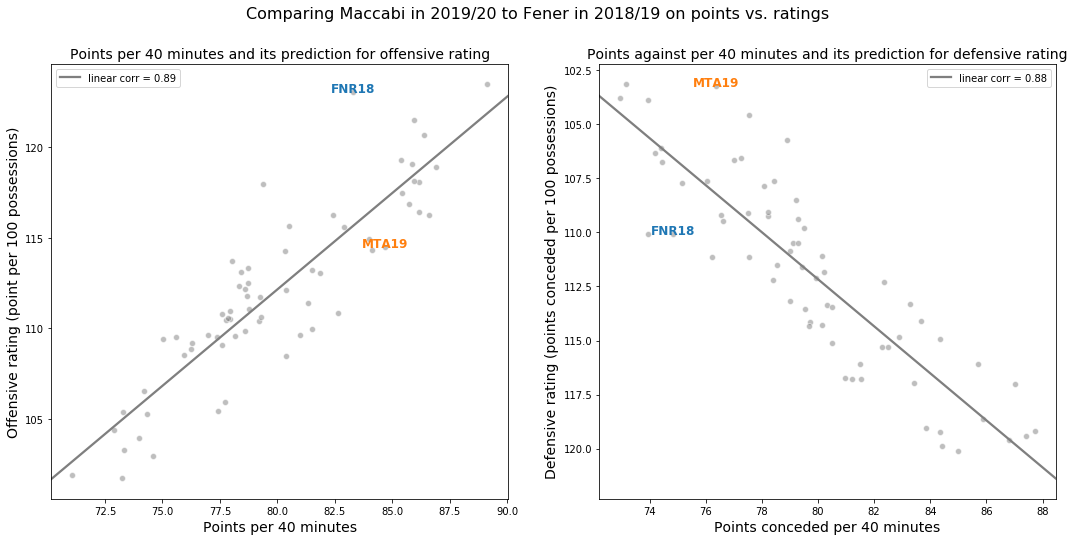

In [5]:
# set up figure and axes, and set parameters for euroleague.plot_bivariate
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
fig.suptitle('Comparing Maccabi in 2019/20 to Fener in 2018/19 on points vs. ratings', fontsize=16);
kwargs = {'df': teams_stats, 'hue': 'pts_rtg_disply', 'fit_reg': True, 'text_size': 'large'}

# plot points per 40 minutes vs offensive rating
e.plot_bivariate(x='PTS40', y='ORtg', ax=axes[0], **kwargs);
axes[0].set_title('Points per 40 minutes and its prediction for offensive rating', fontsize=14);

# plot points conceded per 40 minutes vs defensive rating
e.plot_bivariate(x='OP_PTS40', y='DRtg', ax=axes[1], **kwargs);
axes[1].set_title('Points against per 40 minutes and its prediction for defensive rating', fontsize=14);
axes[1].invert_yaxis()

<font size="4"><br>
left plot:<br>
</font>
<font size="3">
<li>Fener's great offense in 2018/19 cannot be noticed by their points scored due to their low pace (see pace plot below)</li>
<li>Maccabi in 2019/20 scored more points per game than 2018/19 Fener due to their high pace, but much less efficiently</li>
</font>
<font size="4">
<br>right plot:<br>
<font size="3">
<li>The y axis is reversed so higher means better defense</li>
<li>Maccabi's defense in 2019/20 is better than predicted by points conceded due to their high pace (see pace plot below)</li>
<li>Fener's defense in 2018/19 was less efficient than Maccabi's in 2019/20 but they conceded less points due to their lower pace</li>
</font><br>
<font size="3">
* Points are calculated per 40 minutes to eliminate effects of playing overtime<br>
</font>

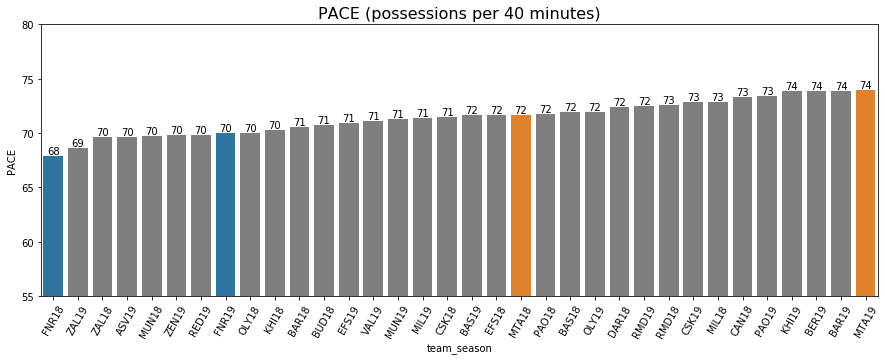

In [6]:
# plot pace of all euroleague teams in 2018/19 and 2019/20
e.sorted_barplot(
    df=teams_stats.loc[teams_stats['season'].isin([2018, 2019])].copy(), metric='PACE',
    marked_teams=['MTA', 'FNR'], show_season=True, figsize=(15, 5), tick_fontsize=10, tick_rot=60
);
plt.ylim(55, 80);